<a href="https://colab.research.google.com/github/lavyay2/-my-projects-for-intern/blob/main/bird_sbecies_observation_analysis_of_labmintex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bird Species Observation Analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# For better visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# File paths
forest_file = "/content/Bird_Monitoring_Data_FOREST.XLSX"
grassland_file = "/content/Bird_Monitoring_Data_GRASSLAND.XLSX"


In [ ]:
# Function to read and tag each sheet

def load_all_sheets(file_path, location_type):
    all_data = []
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet_name)
        df['Admin_Unit_Code'] = sheet_name
        df['Location_Type'] = location_type
        all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

In [ ]:
# Load datasets
df_forest = load_all_sheets(forest_file, 'Forest')
df_grassland = load_all_sheets(grassland_file, 'Grassland')


/tmp/ipython-input-1101360715.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_data, ignore_index=True)


In [ ]:
# Combine all data
df_all = pd.concat([df_forest, df_grassland], ignore_index=True)


In [ ]:
# Convert Date and Time columns
df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce')
df_all['Start_Time'] = pd.to_datetime(df_all['Start_Time'], errors='coerce').dt.time
df_all['End_Time'] = pd.to_datetime(df_all['End_Time'], errors='coerce').dt.time


In [ ]:
# Drop rows without species info
df_all = df_all[~df_all['Scientific_Name'].isnull()].reset_index(drop=True)

In [ ]:

# Add Season column
df_all['Month'] = df_all['Date'].dt.month
season_map = {12:'Winter', 1:'Winter', 2:'Winter',
              3:'Spring', 4:'Spring', 5:'Spring',
              6:'Summer', 7:'Summer', 8:'Summer',
              9:'Fall', 10:'Fall', 11:'Fall'}
df_all['Season'] = df_all['Month'].map(season_map)


# EDA Visualizations with Explanations

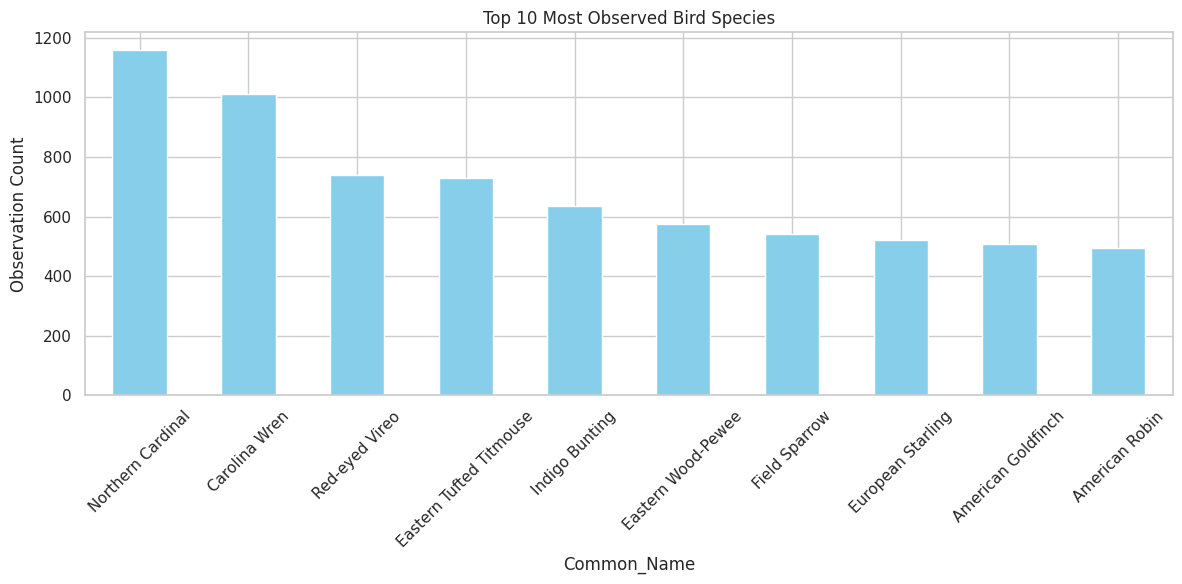

In [ ]:
# 1. Top 10 Most Common Bird Species
# Importance: Identifies the most frequently seen species, indicating dominant or common birds in the ecosystem.
plt.figure()
df_all['Common_Name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Observed Bird Species')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-409263227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all, x='Location_Type', palette='Set2')


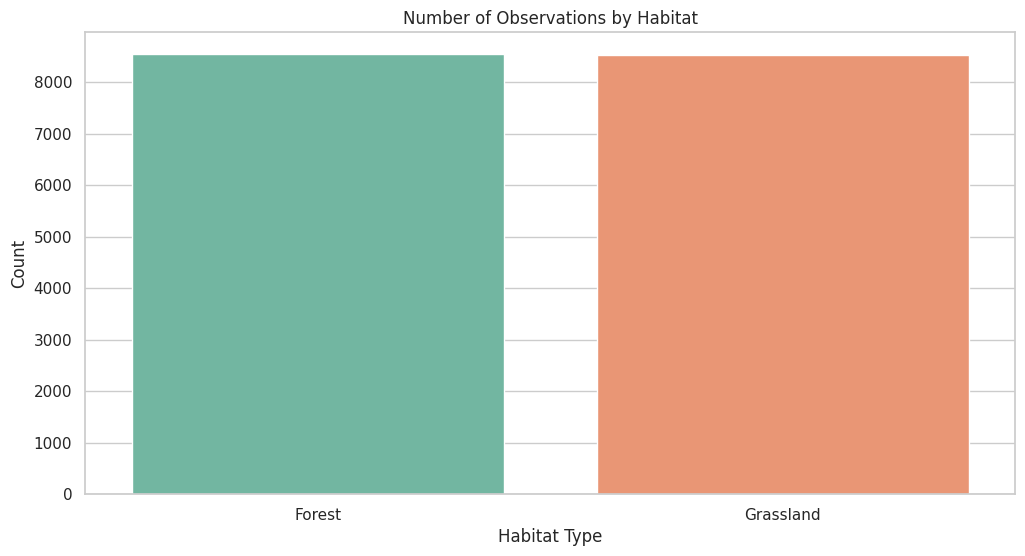

In [ ]:
# 2. Habitat-wise Observation Distribution
# Importance: Compares observation volumes in forest vs grassland.
plt.figure()
sns.countplot(data=df_all, x='Location_Type', palette='Set2')
plt.title('Number of Observations by Habitat')
plt.ylabel('Count')
plt.xlabel('Habitat Type')
plt.show()

/tmp/ipython-input-1695130909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location_Type', y='Scientific_Name', data=diversity, palette='muted')


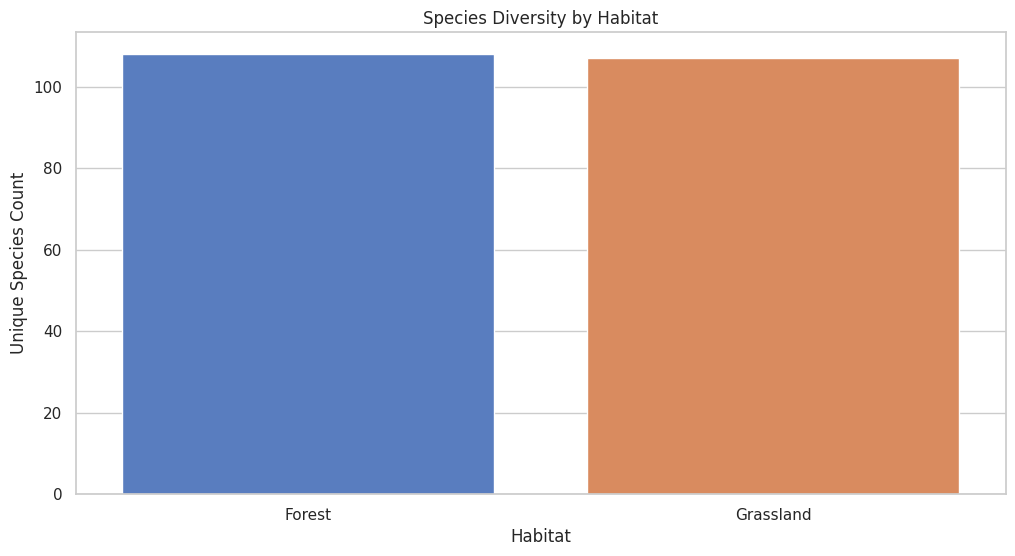

In [ ]:
# 3. Species Diversity by Habitat
# Importance: Measures biodiversity per habitat.
diversity = df_all.groupby('Location_Type')['Scientific_Name'].nunique().reset_index()
sns.barplot(x='Location_Type', y='Scientific_Name', data=diversity, palette='muted')
plt.title('Species Diversity by Habitat')
plt.ylabel('Unique Species Count')
plt.xlabel('Habitat')
plt.show()

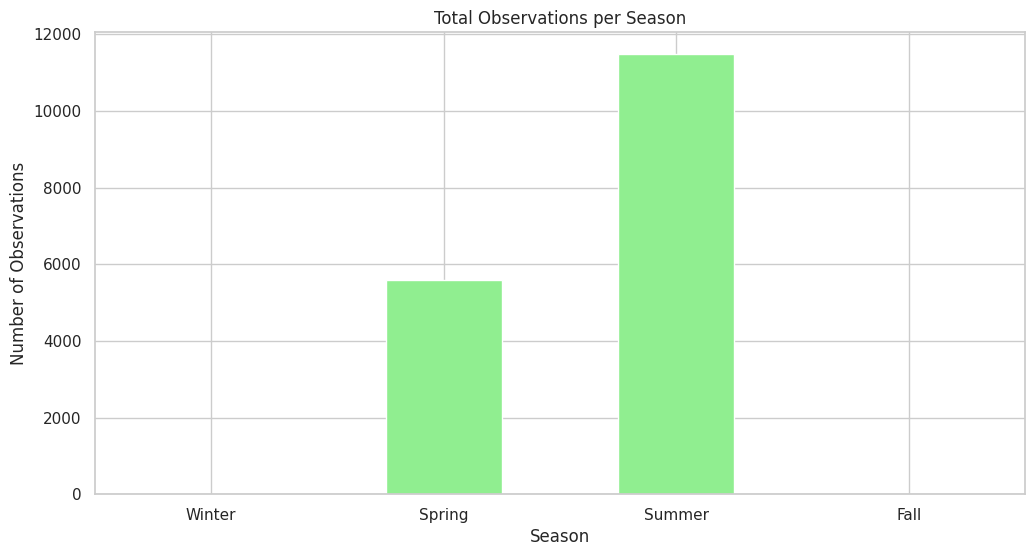

In [ ]:
# 4. Seasonal Trends
# Importance: Determines which seasons see more bird activity.
seasonal = df_all.groupby('Season')['Scientific_Name'].count().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
seasonal.plot(kind='bar', color='lightgreen')
plt.title('Total Observations per Season')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.show()


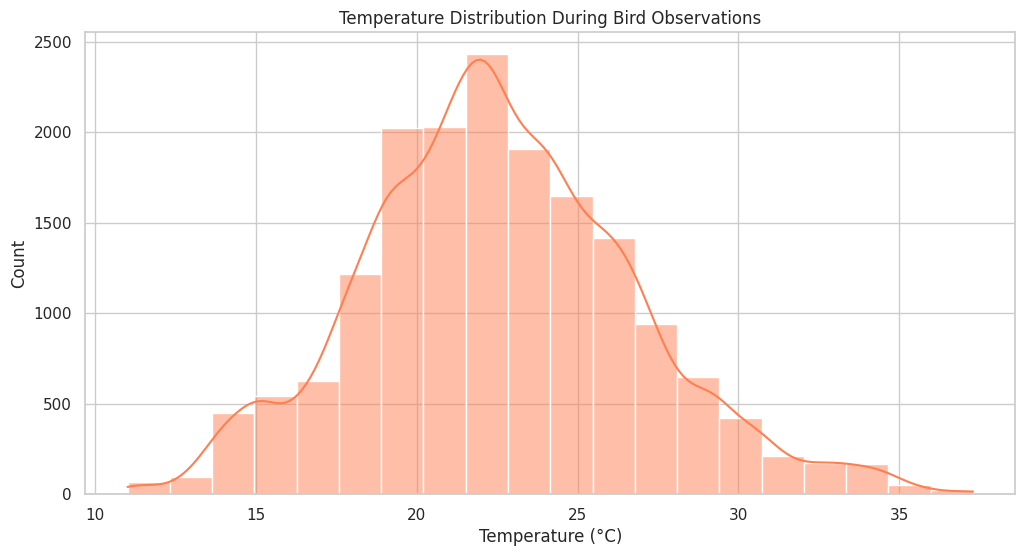

In [ ]:

# 5. Temperature vs. Bird Counts
# Importance: Investigates climate’s effect on bird behavior.
plt.figure()
sns.histplot(data=df_all, x='Temperature', bins=20, kde=True, color='coral')
plt.title('Temperature Distribution During Bird Observations')
plt.xlabel('Temperature (°C)')
plt.show()


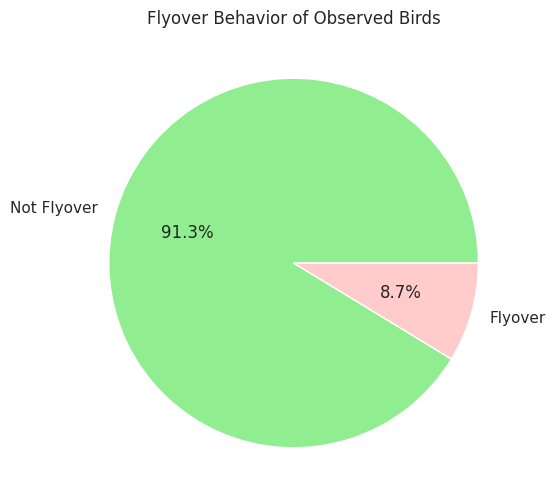

In [ ]:
# 6. Flyover Behavior Comparison
# Importance: Detects flying vs. stationary bird sightings.
flyover = df_all['Flyover_Observed'].value_counts()
flyover.plot(kind='pie', autopct='%1.1f%%', labels=['Not Flyover', 'Flyover'], colors=['#90ee90','#ffcccb'])
plt.title('Flyover Behavior of Observed Birds')
plt.ylabel('')
plt.show()

/tmp/ipython-input-3058228594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all, x='Sex', palette='pastel')


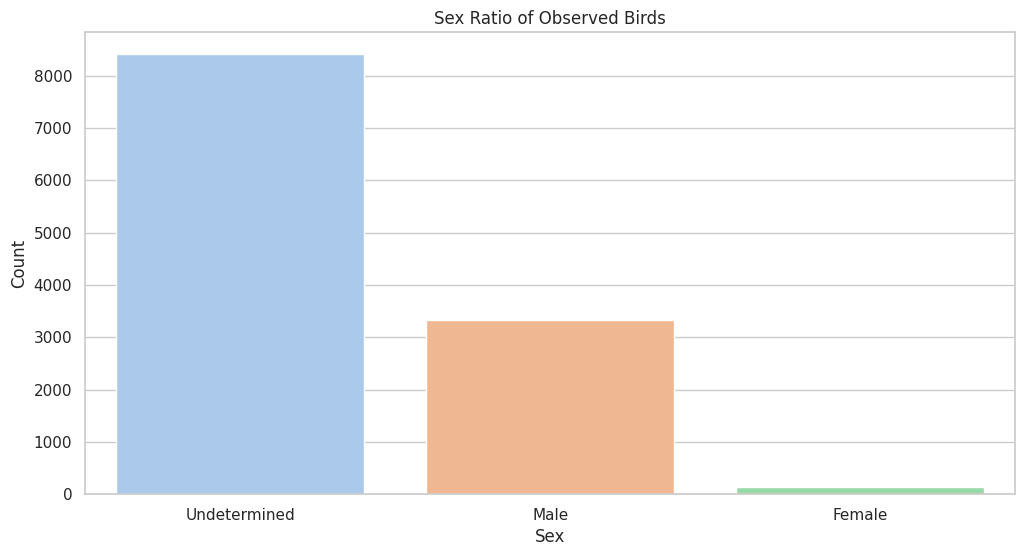

In [ ]:
# 7. Sex Ratio of Observed Birds
# Importance: Gender detection helps track breeding success or survey bias.
plt.figure()
sns.countplot(data=df_all, x='Sex', palette='pastel')
plt.title('Sex Ratio of Observed Birds')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-4183255426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all, x='PIF_Watchlist_Status', palette='coolwarm')


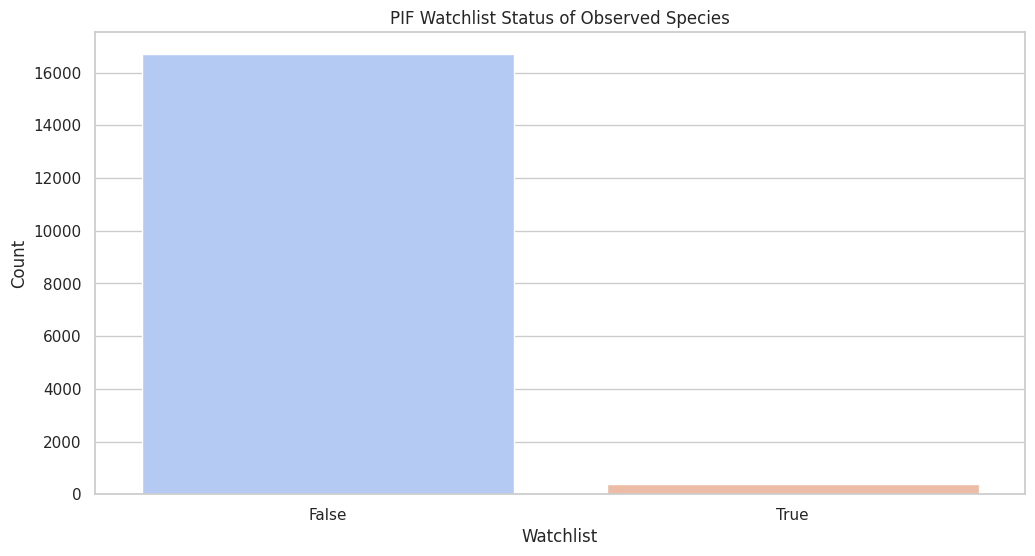

In [ ]:
# 8. PIF Watchlist Analysis
# Importance: Tracks endangered/vulnerable species.
plt.figure()
sns.countplot(data=df_all, x='PIF_Watchlist_Status', palette='coolwarm')
plt.title('PIF Watchlist Status of Observed Species')
plt.xlabel('Watchlist')
plt.ylabel('Count')
plt.show()

In [ ]:
# Summary

print("Total Observations:", len(df_all))
print("Unique Species Observed:", df_all['Scientific_Name'].nunique())
print("Observations per Habitat:\n", df_all['Location_Type'].value_counts())
print("Top 10 Bird Species:\n", df_all['Common_Name'].value_counts().head(10))


Total Observations: 17077
Unique Species Observed: 127
Observations per Habitat:
 Location_Type
Forest       8546
Grassland    8531
Name: count, dtype: int64
Top 10 Bird Species:
 Common_Name
Northern Cardinal          1160
Carolina Wren              1011
Red-eyed Vireo              739
Eastern Tufted Titmouse     728
Indigo Bunting              635
Eastern Wood-Pewee          574
Field Sparrow               542
European Starling           522
American Goldfinch          509
American Robin              496
Name: count, dtype: int64


In [ ]:
# Export cleaned dataset
df_all.to_csv("combined_bird_data.csv", index=False)